# Housing prices prediction
##### Raquel Casado del Río, Miriam Galán Ziouche, María Yacchi Puchaicela and Javier García Carrasco

## 1) Libraries and configuration

In [53]:
import sys
import os
from pathlib import Path
PROJECT_ROOT = Path().resolve().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT));
from config.config import CONFIG
import src.funs as funs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

## 2) Dataset exploration

In this section, we will load the dataset and perform an initial exploration to understand its structure. We'll begin by loading the dataset from the specified path and creating a copy to work with, ensuring that we don't modify the original data unintentionally. This will allow us to inspect the data and identify any potential issues such as missing values, data types, and overall distribution.>

In [54]:
df_orig = pd.read_csv(CONFIG["DATA_PATH"])
df = df_orig.copy()

To start our exploration of the dataset, let's take a look at the first few rows. The head() function will display the first 5 rows of the dataset, allowing us to quickly gain an insight into its structure and the data it contains.

In [55]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The output also shows, in the bottom left corner, the number of rows displayed (5, due to the `head()` method without any parameters) and the total number of columns. However, it would be helpful to know the total number of rows. To address this, we have created the `info_df` function, which provides both the number of rows and columns in the dataset.

In [56]:
funs.info_df(df)

DataFrame Information:
- # Rows: 21613
- # Columns: 22


Therefore, the dataset contains **21613** rows and **22** columns.

To gain a more detailed understanding of the dataset, we'll use the `info()` method. This function provides important information about the dataset, including the total number of rows, columns, the data types of each column and the memory usage. Additionally, it indicates if there are any missing values in the dataset, which is crucial for the data cleaning process.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

The output clearly shows that none of the columns have missing values. To group the column types, we will use the `info_df` function with the `types` argument set to `True`.

In [58]:
funs.info_df(df, types=True)

DataFrame Information:
- # Rows: 21613
- # Columns: 22
- Categorical features: 1
- Numerical features: 21


This way, we can quickly see that there are 21 numerical columns and 1 categorical column.

Now, let’s analyze the meaning of each column:
- `Unnamed: 0`: An index column that was likely generated during data import.     
- `id`: A unique identifier for each house in the dataset.  
- `date`: The date when the house was sold.
- `price`: The sale price of the house (our target variable).
- `bedrooms`: The number of bedrooms in the house.
- `bathrooms`: The number of bathrooms in the house.
- `sqft_living`: The living area of the house in square feet.
- `sqft_lot`: The total lot size in square feet.
- `floors`: The number of floors in the house.
- `waterfront`: A binary indicator of whether the house is located on the waterfront (1 = yes, 0 = no).      
- `view`: A score from 0 to 4 indicating the quality of the house’s view.            
- `condition`: The condition of the house (from 1 to 5, with 1 being poor and 5 being excellent).      
- `grade`: The overall grade given to the house, based on its construction and design.
- `sqft_above`: The square footage of the house’s above-ground living area.
- `sqft_basement`: The square footage of the house’s basement area.
- `yr_built`: The year the house was built.
- `yr_renovated`: The year the house was last renovated.
- `zipcode`: The ZIP code of the house’s location.
- `lat`: The latitude coordinate of the house.
- `long`: The longitude coordinate of the house.
- `sqft_living15`: The square footage of the house’s living area in 2015.
- `sqft_lot15`: The total lot size in square feet in 2015.

Let's now check if there are any duplicate observations, meaning if any row appears more than once in the dataset. We will use the `find_duplicates` function that we created for this purpose.

In [59]:
funs.find_duplicates(df)

No duplicate rows found.


The result shows that there are no duplicate rows. However, let's now analyze if any house identifiers are repeated.

In [60]:
print(f"Repeated id's: {df.shape[0] - len(df.id.unique())}")

Repeated id's: 177


We find that there are 177 repeated identifiers. Even so, since we know that there are no completely identical rows, what’s happening? Let’s check the rows with repeated identifiers to figure it out.

In [61]:
df[df['id'].map(df['id'].value_counts()) > 1]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


We conclude that some houses vary in terms of the date and price while keeping the rest of the values the same. Therefore, the date will be a very important feature for predicting the price.

Now, let's explore some summary statistics using the `describe()` method to get an overview of the dataset's distribution and central tendencies.

In [62]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


It is noteworthy that the minimum values for `bedrooms` and `bathrooms` are 0. Additionally, we observe that if a house has not been renovated, the `yr_renovated` column shows a value of 0.

## 3) Data preprocessing

In this section, we will prepare the dataset for modeling by applying necessary transformations and cleaning steps. Data preprocessing is a crucial part of any machine learning workflow, as it ensures that the data is in the right format and free from inconsistencies or issues that could affect the performance of the model. To achieve this, we will apply the `preprocessing` function that we have created.

The mentioned function is responsible for:
- Removing the `Unnamed: 0` and `id` columns, which are not needed for analysis.
- Converting the `date` column into a datetime object to make it easier to work with.
- Creating two new columns: `year_sold` and `month_sold`, based on the extracted year and month from the date column.
- Creating a new column, `house_age`, by subtracting the year the house was built (`yr_built`) from the year it was sold.
- Adding a column called `time_since_renovation`, which calculates the number of years since the house was last renovated. If the house has not been renovated (`yr_renovated` = 0), the result of the new column is 0.
- Calculating a new column `price_per_sqft`, which represents the price per square foot of the house.
- Calculating `total_sqft` by summing the square footage of the above-ground and basement areas.

This function performs feature engineering, creating new and relevant features that are expected to improve the performance of the machine learning model.

We apply the `preprocessing` function to the dataframe and obtain the cleaned dataframe (`df_cleaned`).

In [63]:
df_cleaned = funs.preprocessing(df)

Just like we did with the original dataframe, we obtain an initial overview of the structure and the data it contains.

In [64]:
df_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,house_age,time_since_renovation,price_per_sqft,total_sqft
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,47.5112,-122.257,1340,5650,2014,10,59,0,188.050847,1180
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,47.7210,-122.319,1690,7639,2014,12,63,23,209.338521,2570
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,47.7379,-122.233,2720,8062,2015,2,82,0,233.766234,770
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,47.5208,-122.393,1360,5000,2014,12,49,0,308.163265,1960
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,47.6168,-122.045,1800,7503,2015,2,28,0,303.571429,1680


We investigate how some columns have been modified using the `info_df` function with the `types` argument set to `True`, which provides information on the number of columns of each type.

In [65]:
funs.info_df(df_cleaned, types=True)

DataFrame Information:
- # Rows: 21597
- # Columns: 25
- Numerical features: 25


We save the dataset with the name `cleaned_data.csv` in the same folder where the original dataset is located.

In [66]:
df_cleaned.to_csv(os.path.join(CONFIG["BASE_DIR"], "data", "cleaned_data.csv"), index=False)

## 4) Data visualization

Is important that we get an idea of the data that we are working with so we made some graphs.

House pricing distribution

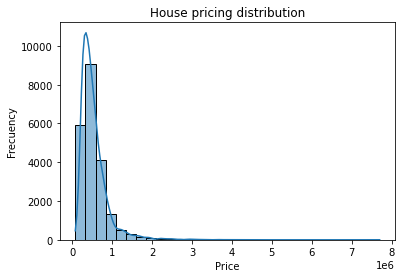

In [67]:
sns.histplot(df_cleaned['price'], kde=True, bins=30)
plt.title('House pricing distribution')
plt.xlabel('Price')
plt.ylabel('Frecuency')
plt.show()

Price vs House size (sqft_living)

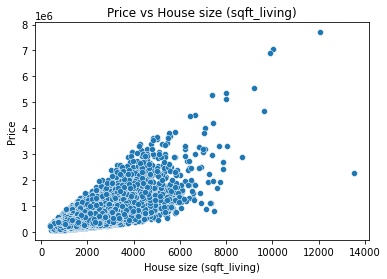

In [68]:
sns.scatterplot(x='sqft_living', y='price', data=df_cleaned)
plt.title('Price vs House size (sqft_living)')
plt.xlabel('House size (sqft_living)')
plt.ylabel('Price')
plt.show()

Price vs House age

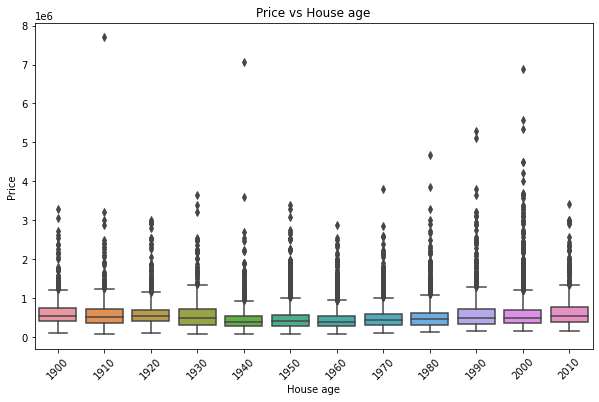

In [69]:
df_cleaned['yr_built_decade'] = (df_cleaned['yr_built'] // 10) * 10
plt.figure(figsize=(10, 6))
sns.boxplot(x='yr_built_decade', y='price', data=df_cleaned)
plt.title('Price vs House age')
plt.xlabel('House age')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Impact of of a view to a body of water to the prices

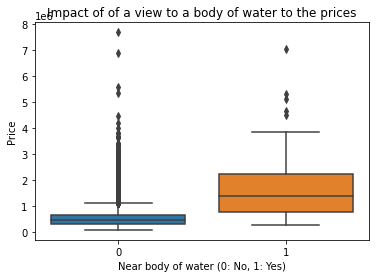

In [70]:
sns.boxplot(x='waterfront', y='price', data=df_cleaned)
plt.title('Impact of of a view to a body of water to the prices')
plt.xlabel('Near body of water (0: No, 1: Yes)')
plt.ylabel('Price')
plt.show()

Distribution of prices depending on the Zipcode

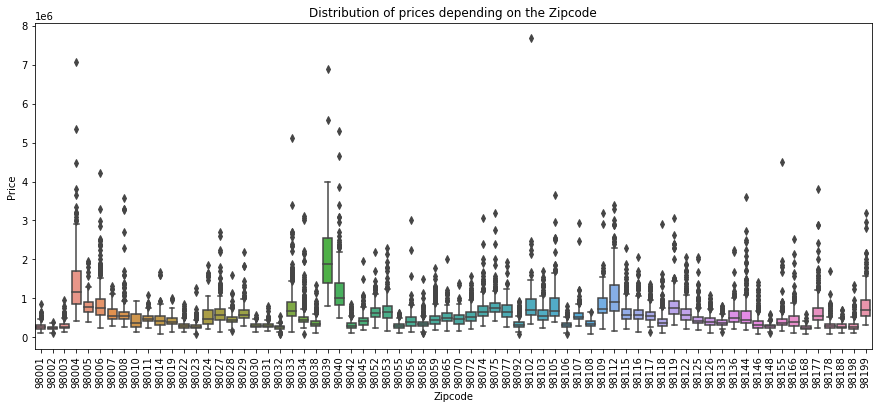

In [71]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='zipcode', y='price', data=df_cleaned)
plt.title('Distribution of prices depending on the Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

Correlation Heatmap

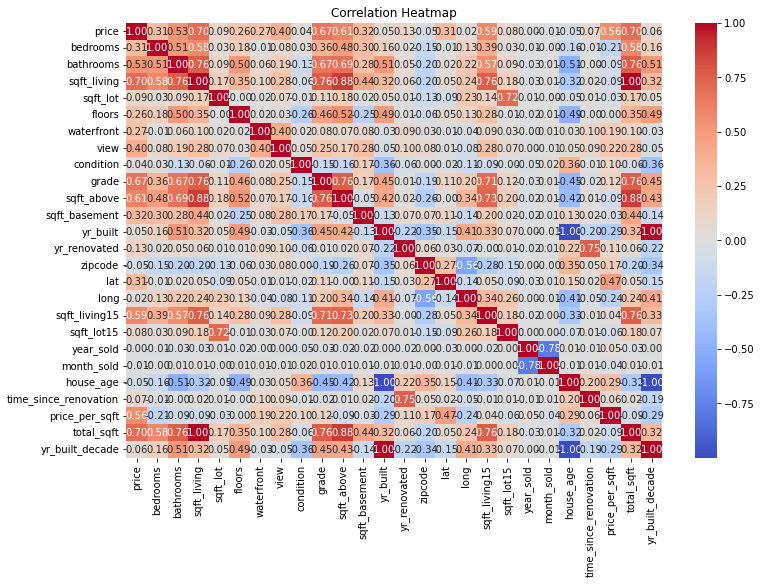

In [72]:
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Price tendency through the years

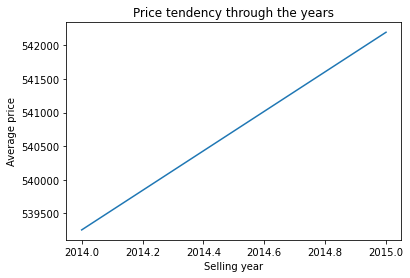

In [73]:
avg_price_per_year = df_cleaned.groupby('year_sold')['price'].mean().reset_index()
sns.lineplot(x='year_sold', y='price', data=avg_price_per_year)
plt.title('Price tendency through the years')
plt.xlabel('Selling year')
plt.ylabel('Average price')
plt.show()

Price vs Number of bedrooms

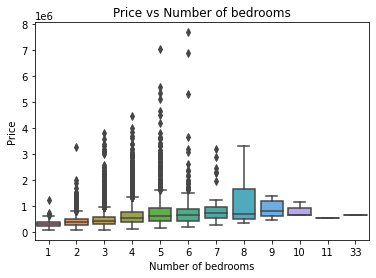

In [74]:
sns.boxplot(x='bedrooms', y='price', data=df_cleaned)
plt.title('Price vs Number of bedrooms')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.show()

Price vs Number of bathrooms

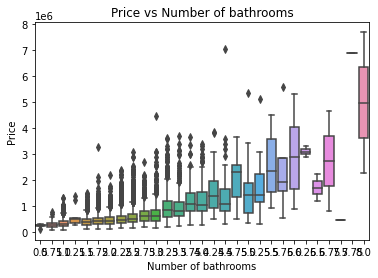

In [75]:
sns.boxplot(x='bathrooms', y='price', data=df_cleaned)
plt.title('Price vs Number of bathrooms')
plt.xlabel('Number of bathrooms')
plt.ylabel('Price')
plt.show()

## 5) Training and evaluation of the models

We prepare the data for training by splitting it into features (`X`) and the target variable (`y`). Then, we further split the dataset into training and testing sets.

In [76]:
X = df_cleaned.drop("price", axis=1)
y = df_cleaned["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=CONFIG["TEST_SIZE"], random_state=42)

Now, we define a dictionary called `models`, which contains different machine learning models that we will use for training and evaluation. All of the models selected are regression models, as the task we aim to solve is related to predicting continuous values.

In [77]:
models = {
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "Linear Regression": LinearRegression(),
    "K-NN": KNeighborsRegressor()
}

We call the function train_evaluate_models that trains and evaluates the previously defined models. The function takes in the models, the training and test data (`X_train`, `X_test`, `y_train`, `y_test`), and the base directory to save the trained models and the figure. It will return a dictionary, `results`, containing the evaluation metrics ($RMSE$ and $R^2$) for each model and plot the comparison of real vs predicted values for each one.

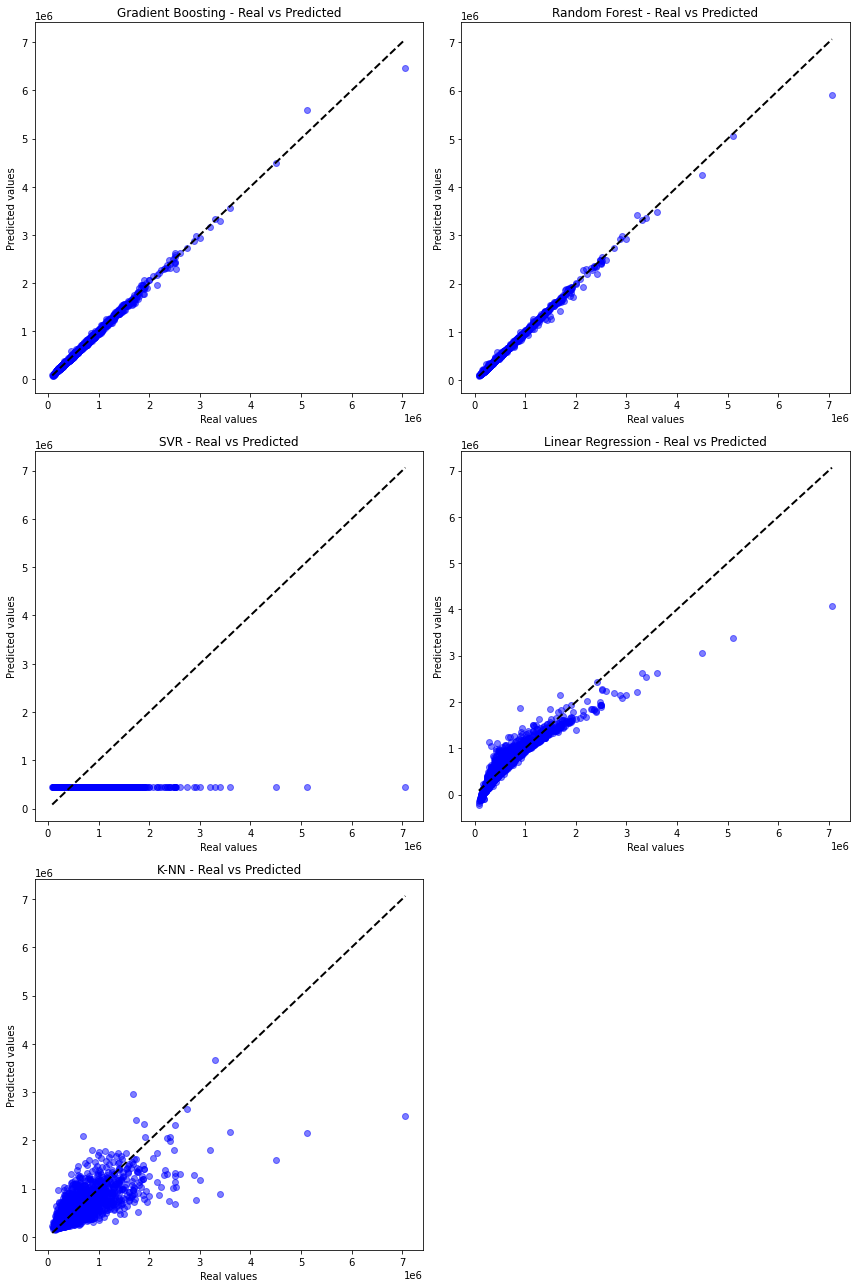

In [78]:
results = funs.train_evaluate_models(models, X_train, X_test, y_train, y_test, CONFIG["BASE_DIR"])

Now, we focus on the numerical values instead of the representations. Specifically, we will look at the $RMSE$ (Root Mean Squared Error) and $R^2$ (R-squared) values to compare the performance of each model. These metrics provide a more direct understanding of how well each model is predicting housing prices.

The $RMSE$ is calculated this way:
$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2} $$

And, $R^2$ this way:
$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2}{\sum_{i=1}^{n} (y_{\text{true}, i} - \bar{y})^2} $$

In [79]:
for model_name, metrics in results.items():
    print(f"{model_name}: RMSE = {metrics['RMSE']:.4f}, R² = {metrics['R2']:.4f}")

Gradient Boosting: RMSE = 20901.1106, R² = 0.9966
Random Forest: RMSE = 23210.2082, R² = 0.9959
SVR: RMSE = 370620.7210, R² = -0.0558
Linear Regression: RMSE = 122051.1488, R² = 0.8855
K-NN: RMSE = 238241.4182, R² = 0.5637
